In [1]:
import pandas as pd
import numpy as np

### I used to think it is easy to read both excel and csv file into pandas DataFrame until I downloaded one dataset from [International Monetary Fund](https://www.imf.org/en/Publications/WEO/weo-database/2021/October). I will go throught the process again to display difficulties I encountered and you will know why I changed my perspective toward reading real dataset.
I uploaded the raw data in case you are too busy to download yourself. 

rather than a rectangular data in which each column is a variable (feature), and each row is a case or record, this data have six parts, including 'Country','Subject Descriptor','Units','Scale','Country/Series-specific Notes', and the values of each year ranging from 2009 to 2021.
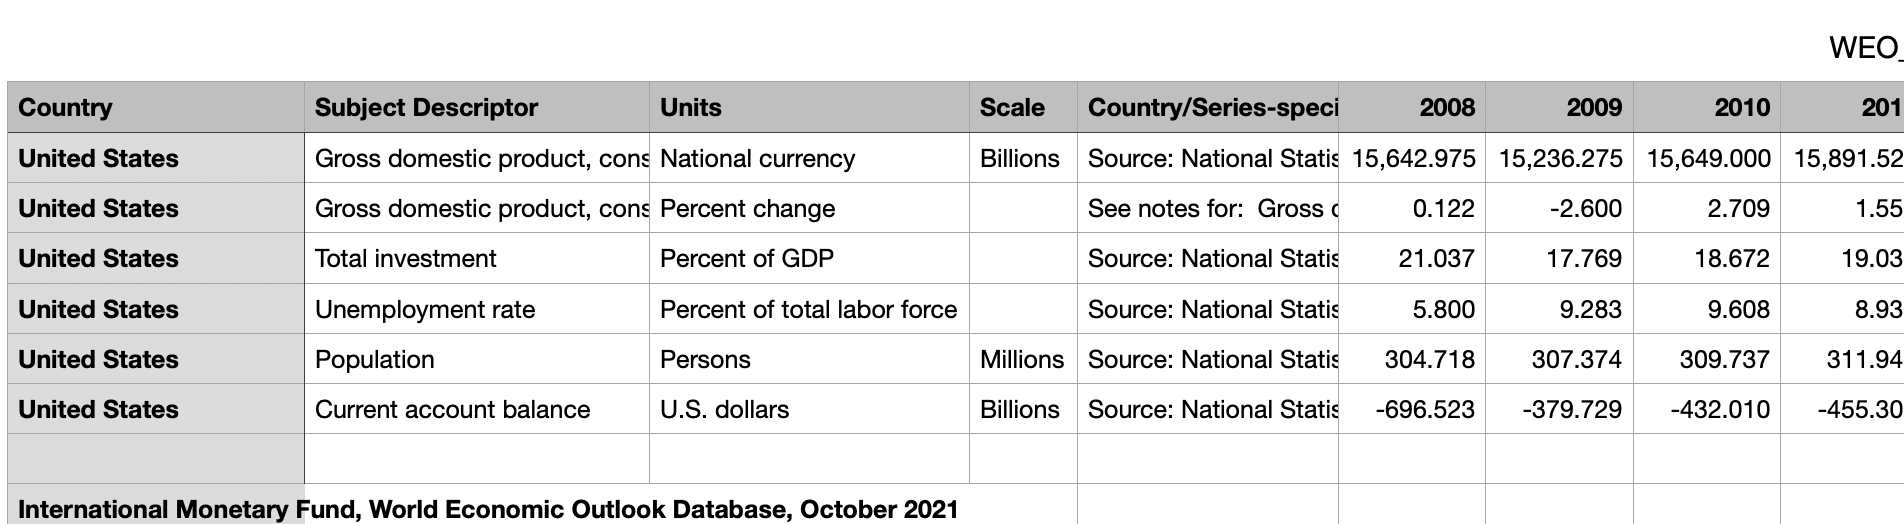

I grouped them into two categories, one of which is data description and the other is the values, and saved them by two files.

### The description file looks like as following:
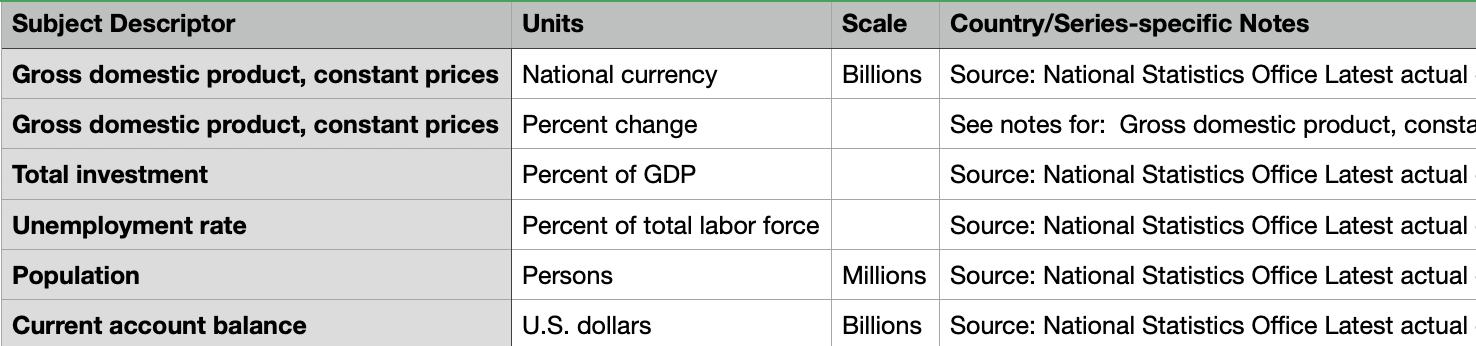

In [2]:
description_file = '/Users/canshuoguo/Downloads/WEO_Data/description.csv'
pd.read_csv(description_file)
# my first attempt to read data got a ParserError
# ParserError: Error tokenizing data. C error: Expected 3 fields in line 28, saw 4.

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,Unnamed: 4
0,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,NaN
1,"Gross domestic product, constant prices",Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN
2,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN
3,Unemployment rate,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,NaN
4,Population,Persons,Millions,Source: National Statistics Office Latest actu...,NaN
5,Current account balance,U.S. dollars,Billions,Source: National Statistics Office Latest actu...,NaN


In [3]:
# I checked this error, only to find that Python found more than one seperators in the cell. 
# That is to say, originally CSV uses comma, as its name implies, as seperator; 
# However, in some cells, they contain comma in themselves, leading python unable to seperate values properly.
# I tried adding one parameter called 'error_bad_lines = False'.
description = pd.read_csv(description_file,error_bad_lines = False)
description

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,Unnamed: 4
0,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,NaN
1,"Gross domestic product, constant prices",Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN
2,Total investment,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN
3,Unemployment rate,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,NaN
4,Population,Persons,Millions,Source: National Statistics Office Latest actu...,NaN
5,Current account balance,U.S. dollars,Billions,Source: National Statistics Office Latest actu...,NaN


In [4]:
value_file = '/Users/canshuoguo/Downloads/WEO_Data//WEO_Data.csv'

### The value file looks like as following:
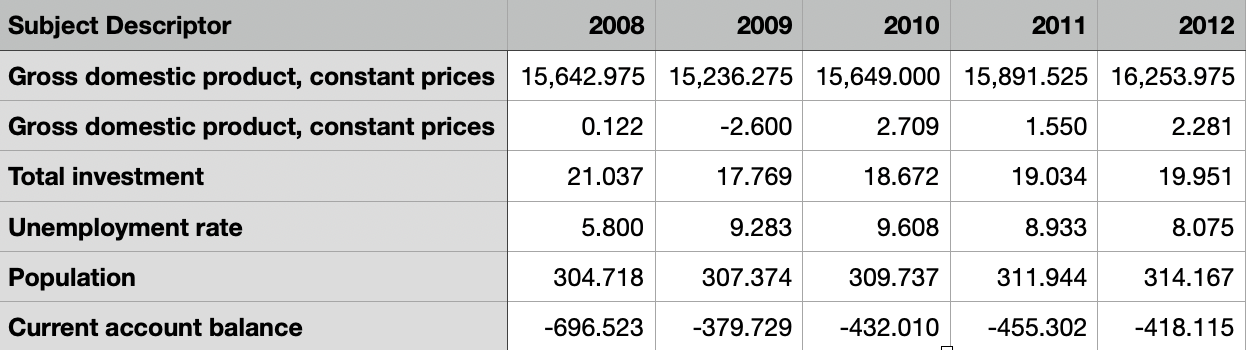

In [5]:
data = pd.read_csv(value_file,error_bad_lines = False)
data

,Subject Descriptor,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Gross domestic product, constant prices","15,642.975","15,236.275","15,649.000","15,891.525","16,253.975","16,553.350","16,932.025","17,390.300","17,680.300","18,079.075","18,606.800","19,032.675","18,384.700","19,482.772"
1,"Gross domestic product, constant prices",0.122,-2.600,2.709,1.550,2.281,1.842,2.288,2.707,1.668,2.255,2.919,2.289,-3.405,5.973
2,Total investment,21.037,17.769,18.672,19.034,19.951,20.343,20.778,21.201,20.567,20.790,21.145,21.365,21.152,21.086
3,Unemployment rate,5.800,9.283,9.608,8.933,8.075,7.358,6.158,5.275,4.875,4.350,3.892,3.683,8.108,5.431
4,Population,304.718,307.374,309.737,311.944,314.167,316.331,318.619,320.926,323.221,325.280,327.023,328.547,329.770,330.659
5,Current account balance,-696.523,-379.729,-432.010,-455.302,-418.115,-339.457,-369.988,-408.888,-397.570,-361.705,-438.235,-472.146,-616.095,-796.117


As mentioned, it isn't a typical rectangular table;
<br>It's not even a long-wide data transform because it only has one country data.
<br>But we will get to it later when we download several countries' data.
<br>Right now, we transform it into a rectangula table step by step.

In [6]:
# actually I thought it was a long-wide data transform task at the very beginning, so I tried df.melt() method.
data_melted= data.melt(id_vars=data.columns[0],value_vars=data.columns[1:],var_name='year')
data_melted

,Subject Descriptor,year,value
0,"Gross domestic product, constant prices",2008,"15,642.975"
1,"Gross domestic product, constant prices",2008,0.122
2,Total investment,2008,21.037
3,Unemployment rate,2008,5.800
4,Population,2008,304.718
...,...,...,...
79,"Gross domestic product, constant prices",2021,5.973
80,Total investment,2021,21.086
81,Unemployment rate,2021,5.431
82,Population,2021,330.659


In [7]:
data_melted.pivot(index='year', columns='Subject Descriptor', values='value')

ValueError: Index contains duplicate entries, cannot reshape

In [8]:
# 'Index contains duplicate entries, cannot reshape'?! 
# check the data, and turn out we got two 'Gross domestic product, constant prices'
# one is in US dollar and another is in growth
# rename them to make them two different index
#Then repeat the process to get a rectangular table
data['Subject Descriptor'][1] = 'Gross domestic product growth'
data_melted= data.melt(id_vars=data.columns[0],value_vars=data.columns[1:],var_name='year')
RecTable = data_melted.pivot(index='year', columns='Subject Descriptor', values='value')
RecTable

Subject Descriptor,Current account balance,Gross domestic product growth,"Gross domestic product, constant prices",Population,Total investment,Unemployment rate
year,,,,,,
2008,-696.523,0.122,"15,642.975",304.718,21.037,5.800
2009,-379.729,-2.600,"15,236.275",307.374,17.769,9.283
2010,-432.010,2.709,"15,649.000",309.737,18.672,9.608
2011,-455.302,1.550,"15,891.525",311.944,19.034,8.933
2012,-418.115,2.281,"16,253.975",314.167,19.951,8.075
2013,-339.457,1.842,"16,553.350",316.331,20.343,7.358
2014,-369.988,2.288,"16,932.025",318.619,20.778,6.158
2015,-408.888,2.707,"17,390.300",320.926,21.201,5.275
2016,-397.570,1.668,"17,680.300",323.221,20.567,4.875


In [9]:
# the original purpose that I found those data was to plot the GDP.
# let's draw a bar out of GDP in currency and a line chart out of GDP growth
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(data=RecTable,x=RecTable.index,y='Gross domestic product, constant prices')
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [10]:
# 'Neither the `x` nor `y` variable appears to be numeric'? 
# check the type of each column
RecTable.dtypes

Subject Descriptor
Current account balance                    object
Gross domestic product growth              object
Gross domestic product, constant prices    object
Population                                 object
Total investment                           object
Unemployment rate                          object
dtype: object

In [11]:
# it turned out to be object for all columns;
# use astype() to change their type to numeric type
RecTable.astype('float')

ValueError: could not convert string to float: '15,642.975'

In [12]:
# Well, because 'Gross domestic product, constant prices' column contains comma in it, it is recognized as string.
# we might use another method - pandas.to_numeric() and add an error='ignore' to ignore this string column
for i in RecTable.columns:
    RecTable[i] = pd.to_numeric(RecTable[i],errors='ignore')
RecTable.dtypes

Subject Descriptor
Current account balance                    float64
Gross domestic product growth              float64
Gross domestic product, constant prices     object
Population                                 float64
Total investment                           float64
Unemployment rate                          float64
dtype: object

In [13]:
# unfortunately, our target column is still not a numeric type, and we cannot plot it.
# the comma needs to be replace.
RecTable['Gross domestic product, constant prices'] = RecTable['Gross domestic product, constant prices'].str.replace(',','')
RecTable['Gross domestic product, constant prices'] = pd.to_numeric(RecTable['Gross domestic product, constant prices'])
RecTable.dtypes
# actually, when reading csv or excel file, both pandas.read_csv() and pandas.read_excel() have a parameter called
# 'thousands'. Passing thousands=',' will also do the work.

Subject Descriptor
Current account balance                    float64
Gross domestic product growth              float64
Gross domestic product, constant prices    float64
Population                                 float64
Total investment                           float64
Unemployment rate                          float64
dtype: object

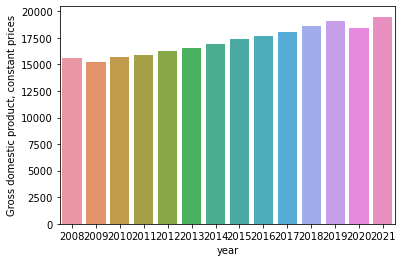

In [14]:
ax = sns.barplot(data=RecTable,x=RecTable.index,y='Gross domestic product, constant prices')
plt.show()

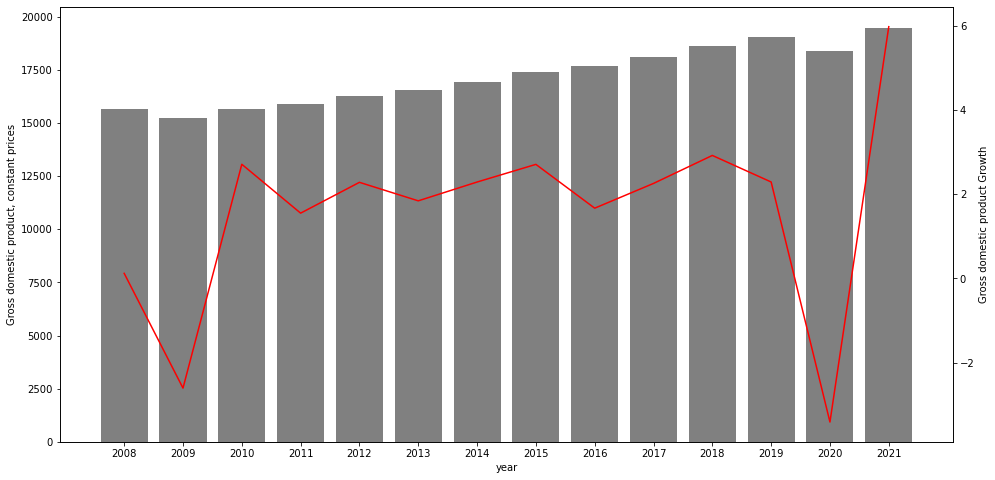

In [15]:
# I really don't expect it is so colorful, to be honest.
# let's try add a line plot to show the growth.
fig=plt.figure(figsize=(16,8))
ax = sns.barplot(data=RecTable,x=RecTable.index,y='Gross domestic product, constant prices',color='grey')
ax1 = ax.twinx()
ax1.plot(RecTable['Gross domestic product growth'],'r-')
ax.set_ylabel('Gross domestic product, constant prices')
ax1.set_ylabel('Gross domestic product Growth')
plt.show()

### one step further
<br> 